---
<img alt="Colaboratory logo" width="15%" src="https://i.postimg.cc/8CdBQXmP/JPLavor.png">

#### **Data Science**
*by [jplavorr](https://linktr.ee/jplavorr)*  

---

O [Airbnb](https://www.airbnb.com.br/), uma das maiores empresas hoteleira da atualidade.

O Airbnb faz a ponte das pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, e ainda oferece uma plataforma inovadora para tornar essa hospedagem alternativa.


Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data/), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de Data Science.

In [ ]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
# importar o arquivo listings.csv da cidade de Nova York para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/united-states/ny/new-york-city/2022-06-03/visualisations/listings.csv")

In [ ]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,225,30,48,2019-11-04,0.31,3,308,0,NaN
1,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68535,-73.95512,Private room,60,30,50,2019-12-02,0.32,2,365,0,NaN
2,5136,"Spacious Brooklyn Duplex, Patio + Garden",7378,Rebecca,Brooklyn,Sunset Park,40.66265,-73.99454,Entire home/apt,275,21,2,2021-08-08,0.02,1,250,1,NaN
3,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Midtown,40.76457,-73.98317,Private room,68,2,536,2022-05-09,3.37,1,172,62,NaN
4,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80380,-73.96751,Private room,75,2,118,2017-07-21,0.76,1,0,0,NaN


**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - Boroughs de Nova Iorque
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel por dia.
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias


# O que pode ser Respondido com Estatística ?

Com estatística, podemos responder a várias perguntas diferentes, como: 

- Qual a probabilidade de alguém comprar um produto? 
- As pessoas estão mais propensas a comprá-lo se puderem usar um sistema de pagamento diferente? 
- Quantos ocupantes seu hotel terá? 
- Como otimizar a ocupação? 
- Quantos tamanhos de jeans precisam ser fabricados para que caibam em 95% da população? 
- Deve ser produzido o mesmo número de cada tamanho? 
- Uma pergunta como: Qual anúncio é mais eficaz para levar as pessoas a comprar um produto? pode ser respondida com testes A/B.

# O que as estatística não pode fazer?
Embora estatística possa responder a muitas perguntas, é importante observar que a estatística não pode responder a todas as perguntas. Se quisermos saber por que a série de TV é tão popular, podemos perguntar a todos por que eles gostam, mas eles podem mentir ou deixar de fora os motivos. Podemos ver se séries com cenas mais violentas atraem mais espectadores, mas mesmo que o façam, não podemos saber se a violência em determinada série é o motivo de sua popularidade, ou se outros fatores estão impulsionando sua popularidade e se apenas passa a ser violento.

# Medidas Centrais

## Média
A média, é uma das formas mais comuns de resumir dados. Para calcular a média, somamos todos os números de interesse e dividimos pelo número total de pontos de dados
$$ avg =  \dfrac{x_1 + \dots + x_n}{n}$$


Em Python, podemos usar a função média do NumPy, passando a variável de interesse.

In [ ]:
import numpy as np

In [ ]:
np.mean(df["price"])

190.77522052927026

In [ ]:
df.price.mean()

190.77522052927026

## Mediana 

Outra medida de centro é a mediana. A mediana é o valor em que 50% dos dados é menor que ele e 50% dos dados é maior. Podemos calcular ordenando nossos pontos e pegando o do meio.

$$ x_1, \dots, x_i, \dots, x_n $$ 

onde $x_1 < x_i < x_n$.



 Em Python, podemos usar `np.median()` para fazer os cálculos.

In [ ]:
# Ordenar os dados
df.price.sort_values()

24327        0
21897        0
22761        0
25592        0
22700        0
         ...  
20187    10000
20184    10000
30265    10000
20182    10000
19583    12900
Name: price, Length: 37410, dtype: int64

In [ ]:
np.median(df.price)

125.0

In [ ]:
df.price.median()

125.0

## Moda 

A moda é o valor mais frequente nos dados. Se contarmos quantas ocorrências existem de cada valor da variável `minimum_nights` e ordenarmos em ordem descendente, teremos que o valor da moda é 30.

Também podemos encontrar usando a função `mode()` da biblioteca `statistics`.

In [ ]:
df.minimum_nights.value_counts()

30     17287
1       5856
2       4463
3       3189
5       1277
       ...  
53         1
198        1
114        1
119        1
121        1
Name: minimum_nights, Length: 122, dtype: int64

In [ ]:
import statistics
statistics.mode(df.minimum_nights)

30

A moda é comumente usada em variáveis categóricas.

In [ ]:
statistics.mode(df.neighbourhood_group)

'Manhattan'

# Agora que temos muitas maneiras de medir o centro, como sabemos qual usar?

In [ ]:
df[df.neighbourhood_group == 'Manhattan']["price"].agg([np.mean, np.median])

mean      257.813119
median    170.000000
Name: price, dtype: float64

In [ ]:
df_copy = df.copy()

In [ ]:
df_copy.loc[df_copy.shape[0]] = [5203,	"Cozy" ,"Clean Guest Room - Family Apt	7490"	,"MaryEllen"	,"Manhattan"	,"Upper West Side",	40.80380	,-73.96751,	"Private room"	,5000 ,	2	,118,	"2017-07-21"	, " "	,	" "," "	," ", " "	]

In [ ]:
df_copy[df_copy.neighbourhood_group == 'Manhattan']["price"].agg([np.mean, np.median])

mean      258.112197
median    170.000000
Name: price, dtype: float64

Isso ocorre porque a média é muito mais sensível a valores extremos do que a mediana.

Como a média é mais sensível a valores extremos, ela funciona melhor para dados simétricos como esse. Observe que a média, em preto, e a mediana, em vermelho, são bem próximas.

In [ ]:
from matplotlib.ticker import StrMethodFormatter

In [ ]:
def histogram(df, column):  
  ax = df.hist(column=column, bins=10, grid=False, figsize=(12,8), color='#aebfd7', zorder=2, rwidth=0.9)
  plt.axvline(df[column].mean(), color='b', linestyle='dashed', linewidth=1)
  #plt.axvline(df[column].std(), color='r', linestyle='dashed', linewidth=1)
  plt.axvline(df[column].median(), color='r', linestyle='dashed', linewidth=1)
  min_ylim, max_ylim = plt.ylim()
  plt.text(df[column].mean()*1.1, max_ylim*0.9, 'Média: {:.2f}'.format(df[column].mean()))
  #plt.text(df[column].std()*1.1, max_ylim*0.85, 'Std: {:.2f}'.format(df[column].std()))
  plt.text(df[column].median()*1.1, max_ylim*0.85, 'Mediana: {:.2f}'.format(df[column].median()))
  ax = ax[0]
  for x in ax:

      # Despine
      x.spines['right'].set_visible(False)
      x.spines['top'].set_visible(False)
      x.spines['left'].set_visible(False)

      # Switch off ticks
      x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

      # Draw horizontal axis lines
      vals = x.get_yticks()
      for tick in vals:
          x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

      # Remove title
      x.set_title("")

      # Set x-axis label
      x.set_xlabel("Numero de Ocorrências", labelpad=20, weight='bold', size=12)

      # Set y-axis label
      x.set_ylabel("Frequencia", labelpad=20, weight='bold', size=12)
      
      # Format y-axis label
      x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))
  plt.show()

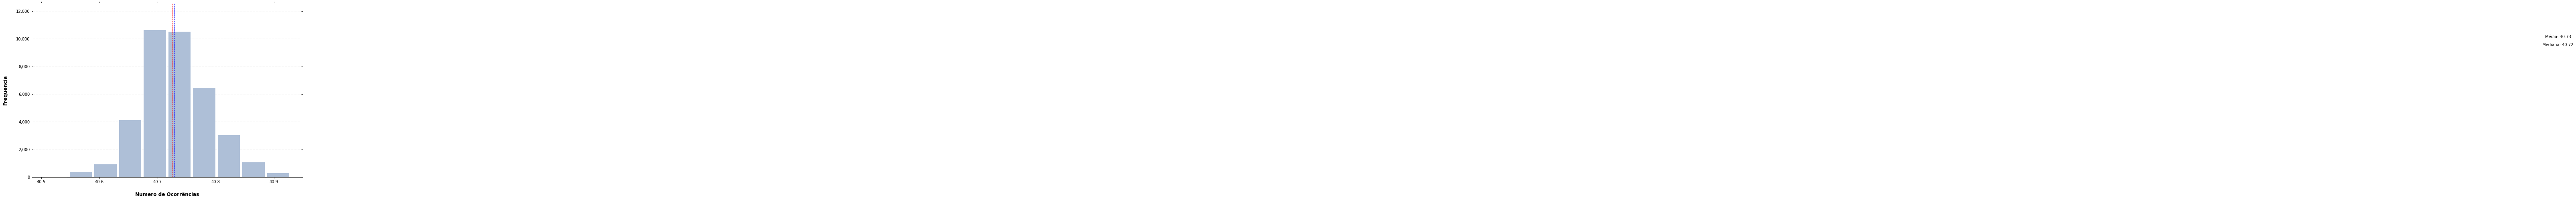

In [ ]:
histogram(df,"latitude")

No entanto, se os dados estiverem distorcidos, o que significa que não são simétricos, como este, geralmente é melhor usar a mediana. Neste histograma, os dados são empilhados à direita, com uma cauda à esquerda. Dados que se parecem com isso são chamados de dados assimétricos à esquerda. Quando os dados são empilhados à esquerda com uma cauda à direita, eles são distorcidos à direita.

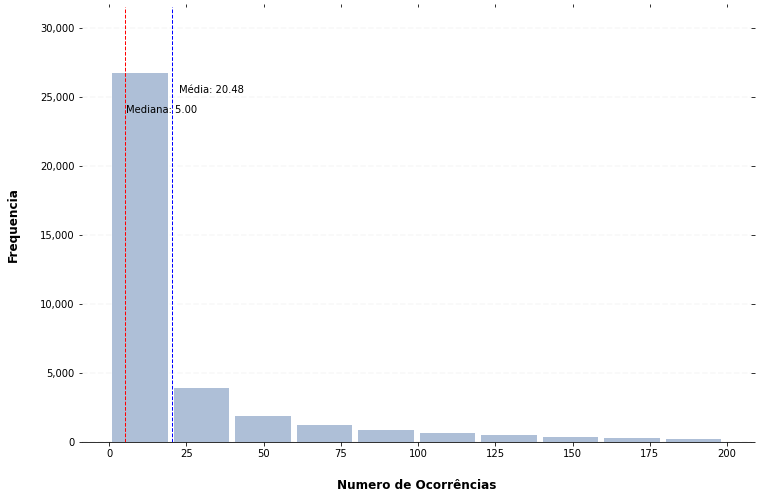

In [ ]:
histogram(df[df.number_of_reviews < 200],"number_of_reviews")

# Medidas de Dispersão

Dispersão(Spread) é exatamente o que parece - descreve o quão dispersos ou próximos estão os dados. Assim como as medidas de centro, existem algumas medidas diferentes de Dispersão.

# Variância
A primeira medida, variância, mede a distância média de cada ponto de dados até a média dos dados.

## Calculando a variação
Para calcular a variância, começamos calculando a distância entre cada ponto e a média, de modo que obtemos um número para cada ponto de dados. Em seguida, elevamos ao quadrado cada distância e, em seguida, adicione-os todos juntos. Finalmente, dividimos a soma das distâncias ao quadrado pelo número de pontos de dados menos 1, dando-nos a variância.

$$ var = \dfrac{1}{n-1} ∑^n_{i=1} (\bar x - x_i)^2$$



In [ ]:
dists = df.price - np.mean(df.price)

In [ ]:
sq_dist = dists**2

In [ ]:
sum_dist = np.sum(sq_dist)

In [ ]:
var_price = sum_dist/(df.shape[0] -1)

In [ ]:
var_price

117300.59752544656

In [ ]:
#df.price.var()
## ddof = 1 indica que é a variância da amostra
np.var(df.price, ddof=1)

117300.59752544656


Quanto maior a variância, mais dispersos são os dados. 

É importante observar que as unidades de variância são elevadas ao quadrado, portanto, neste caso, são 117300.59 price ao quadrado.

#Desvio padrão
O desvio padrão é outra medida de dispersão, calculada pela raiz quadrada da variância. Pode ser calculado usando `np.std()`.


In [ ]:
np.sqrt((np.var(df.price, ddof=1)))

342.491748112924

In [ ]:
np.std(df.price, ddof=1)

342.491748112924

O bom do desvio padrão é que as unidades geralmente são mais fáceis de entender, pois não são quadradas.

# Desvio médio absoluto
O desvio absoluto médio obtém o valor absoluto das distâncias à média e, em seguida, obtém a média dessas diferenças. 

In [ ]:
dists = df.price - np.mean(df.price)

In [ ]:
np.mean(np.abs(dists))

129.21380316984232

Embora isso seja semelhante ao desvio padrão, não é exatamente o mesmo. O desvio padrão eleva as distâncias ao quadrado, de modo que as distâncias mais longas são mais penalizadas do que as mais curtas, enquanto o desvio absoluto médio penaliza cada distância igualmente. Um não é melhor que o outro, mas SD é mais comum que MAD.

# Quantil
Os quantis, também chamados de percentis, dividem os dados em algumas partes iguais. Aqui, chamamos `np.quantil()`, passando na coluna de interesse, seguido pelo 0.5.  Isso nos diz que 50% dos dados do conjunto estão abaixo desse valor, e os outros 50% estão acima, então este é exatamente o igual à mediana. 

In [ ]:
np.quantile(df.price, 0.5)

125.0

Também podemos passar uma lista de números para obter vários quantis de uma só vez. Aqui, dividimos os dados em 4 partes iguais. 

In [ ]:
np.quantile(df.price, [0, 0.25, 0.5, 0.75, 1])

array([    0.,    75.,   125.,   203., 12900.])

In [ ]:
#Quantiles usando linespace
#ponto de começo, pronto final e número de intervalos
np.quantile(df.price, np.linspace(0,1,5))

array([    0.,    75.,   125.,   203., 12900.])

# Box-Plot

<img alt="Colaboratory logo" width="75%" src="https://i.postimg.cc/y85xCH3B/box-plot.png">


As caixas em box plots representam os quartis. A parte inferior da caixa é o primeiro quartil e a parte superior da caixa é o terceiro quartil. A linha do meio é o segundo quartil ou a mediana.

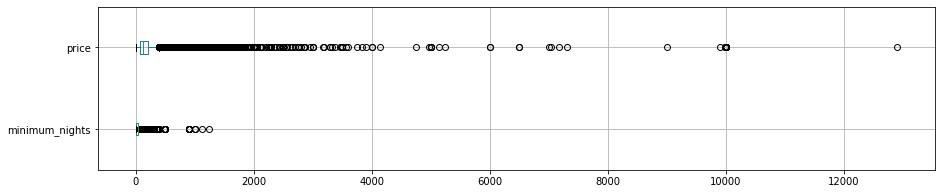

In [ ]:
#Plotar um boxplot
df.boxplot(['minimum_nights', 'price'], vert=False, figsize=(15,3))
plt.show()

# intervalo interquartil (IQR)
O intervalo interquartil, ou IQR, é outra medida de propagação. É a distância entre o percentil 25 e 75, que também é a altura da caixa em um boxplot. Podemos calculá-lo usando a função quantil ou usando a função IQR de `scipy.stats()`.

In [ ]:
iqr = np.quantile(df["price"], 0.75) - np.quantile(df.price, 0.25)

In [ ]:
from scipy import iqr

ImportError: ignored

In [ ]:
iqr(df.price)

AttributeError: ignored

# Outliers
Outliers são pontos de dados que são substancialmente diferentes dos outros. Mas como sabemos o que é uma diferença substancial? 

Uma regra que é frequentemente usada é:

- Qualquer ponto de dados menor que o primeiro quartil menos 1.5 vezes o IQR ($ data < 1Q - 1.5*IQR $) é um valor discrepante, assim como qualquer ponto maior que o terceiro quartil mais 1.5 vezes o IQR ($ 3Q + 1.5*IQR > data$).

In [ ]:
#iqr = iqr(df.price)

lim_inf = np.quantile(df.price, 0.25) - 1.5*iqr
lim_sup = np.quantile(df.price, 0.75) + 1.5*iqr

In [ ]:
print(lim_sup)

395.0


In [ ]:
df[(df["price"] < lim_inf) | (df.price > lim_sup)].head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
25,80684,Duplex w/ Terrace @ Box House Hotel,417504,The Box House Hotel,Brooklyn,Greenpoint,40.73756,-73.95350,Hotel room,529,3,10,2021-11-13,0.08,30,164,2,NaN
60,15396,Sunny & Spacious Chelsea Apartment,60278,Petra,Manhattan,Chelsea,40.74493,-73.99521,Entire home/apt,400,30,5,2018-11-03,0.07,1,61,0,NaN
77,16595,Full Floor Loft ~ Six Windows ~ Home Theater ~...,64522,Ariel,Brooklyn,Williamsburg,40.70920,-73.96641,Entire home/apt,500,1,229,2022-05-23,1.62,2,364,32,NaN
90,103311,2 BR w/ Terrace @ Box House Hotel,417504,The Box House Hotel,Brooklyn,Greenpoint,40.73778,-73.95366,Private room,785,3,9,2018-05-19,0.07,30,107,0,NaN
123,23686,2000 SF 3br 2ba West Village outdoor living house,93790,Ann,Manhattan,West Village,40.72961,-74.00308,Entire home/apt,620,7,54,2022-05-15,0.45,2,228,4,NaN


In [ ]:

# ver quantidade de valores acima de 1500 para price
print("\nprice: valores acima")
print("{} entradas".format(len(df[df.price > lim_sup])))
print("A porcentagem desses valores em relação ao DataSet:\t{:.4f}%".format((len(df[df.price > lim_sup]) / df.shape[0])*100))


price: valores acima
3044 entradas
A porcentagem desses valores em relação ao DataSet:	8.1369%
